In [1]:
import datetime
import sys
import os.path as path
import math
import matplotlib.pyplot as plt
import numpy as np
import importlib

sys.path.append("..")
# from core import *

import test_data as td
importlib.reload(td)
from test_data import *

td.set_test_data(
    data_size=5000, 
    start_time=datetime.datetime(2023, 3, 21, 11, 25, 
                                 tzinfo=datetime.timezone.utc).timestamp(),
    moving_av=False
    )
VALUE = td.DATA

Test data size is 5000
Test data start time is 2023:03:21 11:26
Test data end time is   2023:03:24 22:45
Subtracting moving avarage: False


In [2]:
import gasnace_swieczki as gs
importlib.reload(gs)
from gasnace_swieczki import *

FIG_SIZE = (6, 5)
DPI = 100

## Gasnące Świeczki

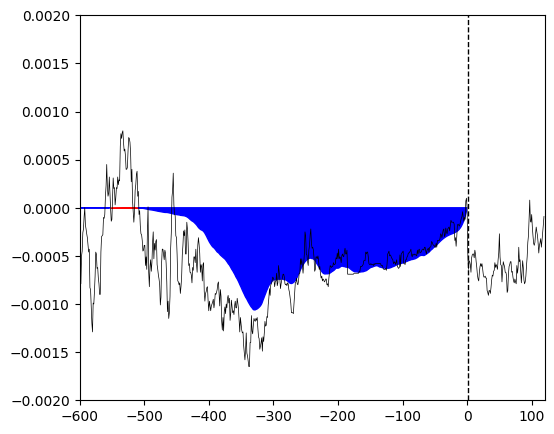

In [3]:
gs.CURRENT_RANGE = 10 * 60
gs.FUTURE_RANGE = 2 * 60
gs.Y_RANGE = [-2e-3, 2e-3]
gs.FILTER = Savgol_filter(window=100, order=5) # None # 
gs.QUENCH = CustomQuench(tau=400, exp=6) # None # 
plt.figure(figsize=(FIG_SIZE), dpi=DPI)
PlotBoth(time_start=100, plotter=plt, axis_off=False).plot()
plt.show()

In [4]:
STEP = 20
N = 10

remove_all()

for start_time in [i * STEP for i in range(N)]:
    save(start_time)

## %%%%%%%%%%%%%%%%%

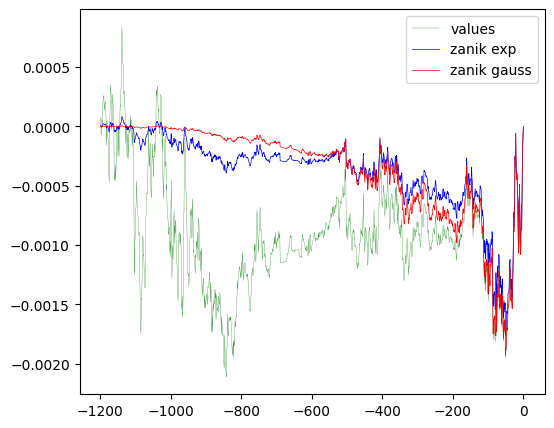

In [5]:
shift = 5
value = VALUE[0 + shift: 1200 + shift]
value = value - value[-1]
time_count = np.array([i for i in range(len(value))], dtype='float64')
time_count = time_count - time_count[-1]

zanik_gauss = value * GaussQuench(tau=500).quench(time_count)
zanik_exp = value * ExpQuench(tau=500).quench(time_count)

plt.figure(figsize=(FIG_SIZE), dpi=DPI)
plt.plot(time_count, value, label='values', color='green', linewidth=0.2)
plt.plot(time_count, zanik_exp, label='zanik exp', color='blue', linewidth=0.5)
plt.plot(time_count, zanik_gauss, label='zanik gauss', color='red', linewidth=0.5)
plt.legend()
plt.show()


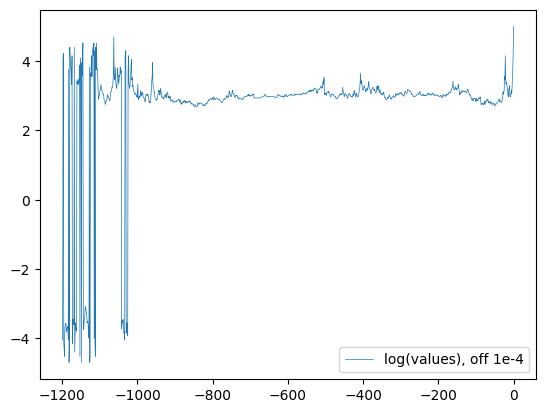

In [6]:
plt.plot(time_count, LogPlot().convert(value), label='log(values), off 1e-4', linewidth=0.5)
plt.legend()  
plt.show()

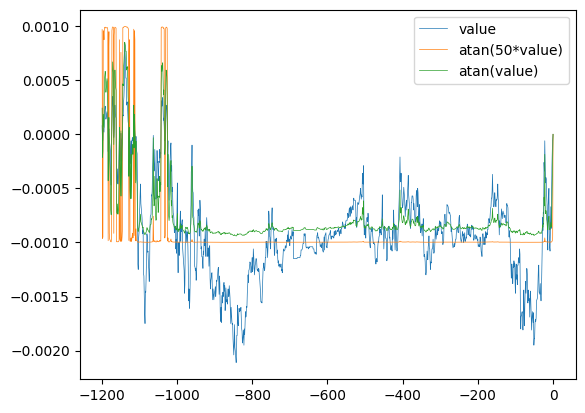

In [7]:
range = 1e-3
plt.plot(time_count, value, label='value', linewidth=0.5)
plt.plot(time_count, ATanPlot(range=range).convert(value * 50), label='atan(50*value)', linewidth=0.5)
plt.plot(time_count, ATanPlot(range=range).convert(value), label='atan(value)', linewidth=0.5)
# plt.axis([-CURRENT_RANGE, 0, Y_RANGE[0], Y_RANGE[1]])
plt.legend()  
plt.show()

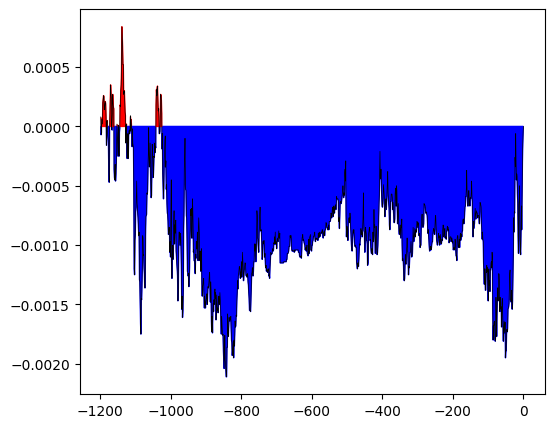

In [8]:
plt.figure(figsize=(FIG_SIZE), dpi=DPI)
plt.plot(time_count, value, color='black', linewidth=0.5)
plt.fill_between(time_count, value, where=((value < 0)), color='blue')
plt.fill_between(time_count, value, where=((value > 0)), color='red')

plt.show()